In [70]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button, Slider

In [71]:
# Paramètres du modèle

t_0 = 0 # Initial time
t_f = 50 # Max time
dt = 1 # Time step (days ?)

time = np.arange(t_0, t_f + dt, dt)

rows = 50
columns = 50
res = 1

In [72]:
# Variables
Var = np.zeros((len(time), int(x_range / res), int(y_range / res)))

for t in range(0, len(time)) :
  for row in range(0, Var.shape[1]) :
    for col in range(0, Var.shape[2]) :
      dVar_dt = 1 * (1 - row/rows)

      Var[t, row, col] = Var[t - 1, row, col] + dVar_dt * dt

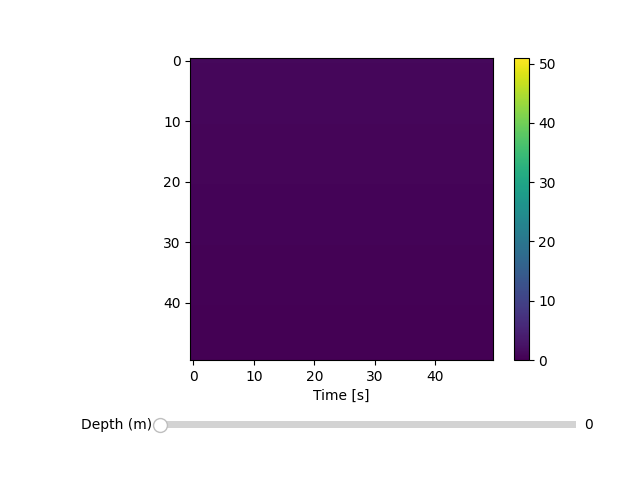

In [73]:
# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
tile = plt.imshow(Var[0, :, :], cmap = 'viridis', vmin = 0, vmax = Var.max())
plt.colorbar(tile)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left = 0.25, bottom = 0.25)

# Make a horizontal slider to control the frequency.
axtime = fig.add_axes([0.25, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax = axtime,
    label = 'Depth (m)',
    valmin = t_0,
    valmax = t_f,
    valinit = t_0,
    valstep = dt
)

# The function to be called anytime a slider's value changes
def update(val):
    ax.imshow(Var[val, :, :], cmap = 'viridis', vmin = 0, vmax = Var.max())
    fig.canvas.draw()

# register the update function with each slider
time_slider.on_changed(update)

plt.show()